In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [10]:
train_data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/house_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/house_test.csv")

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
train_data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [14]:
train_data.isna().sum().sort_values(ascending=False).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Id', 'Functional',
       'Fireplaces', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath',
       'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig',
       'YearBuilt', 'Utilities', 'LandContour', 'LotShape', 'Street',
       'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd', '2ndFlrSF',
       'BsmtFinSF2', '1stF

In [15]:
# 데이터 2개 똑같이 셋팅해야함
train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [17]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [18]:
# 결측값 해결
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1319 non-null   int64  
 1   MSSubClass     1319 non-null   int64  
 2   MSZoning       1319 non-null   object 
 3   LotArea        1319 non-null   int64  
 4   Street         1319 non-null   object 
 5   LotShape       1319 non-null   object 
 6   LandContour    1319 non-null   object 
 7   Utilities      1319 non-null   object 
 8   LotConfig      1319 non-null   object 
 9   LandSlope      1319 non-null   object 
 10  Neighborhood   1319 non-null   object 
 11  Condition1     1319 non-null   object 
 12  Condition2     1319 non-null   object 
 13  BldgType       1319 non-null   object 
 14  HouseStyle     1319 non-null   object 
 15  OverallQual    1319 non-null   int64  
 16  OverallCond    1319 non-null   int64  
 17  YearBuilt      1319 non-null   int64  
 18  YearRemo

In [20]:
train_data.corr(method='spearman').sort_values('SalePrice', ascending=False)['SalePrice']
# 상관도 관련있는애들만 뽑기 보통 0.7 이상임 (음수는 관련 x애들)
# 이번엔 0.5 이상인 애들만 살리기

C:\Users\hi\AppData\Local\Temp\ipykernel_12524\2791723758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr(method='spearman').sort_values('SalePrice', ascending=False)['SalePrice']


SalePrice        1.000000
OverallQual      0.803029
GrLivArea        0.735463
GarageCars       0.669188
FullBath         0.656058
YearBuilt        0.643562
GarageArea       0.615581
GarageYrBlt      0.588605
YearRemodAdd     0.577079
1stFlrSF         0.576921
TotalBsmtSF      0.569920
TotRmsAbvGrd     0.548931
Fireplaces       0.494716
OpenPorchSF      0.482497
LotArea          0.446115
MasVnrArea       0.397368
WoodDeckSF       0.334859
HalfBath         0.312766
2ndFlrSF         0.285968
BsmtFinSF1       0.258025
BedroomAbvGr     0.230137
BsmtFullBath     0.198568
BsmtUnfSF        0.148689
ScreenPorch      0.077653
MoSold           0.072166
3SsnPorch        0.065590
PoolArea         0.056545
MSSubClass       0.017942
YrSold          -0.020063
Id              -0.031078
BsmtHalfBath    -0.033394
MiscVal         -0.059125
LowQualFinSF    -0.062116
BsmtFinSF2      -0.076949
KitchenAbvGr    -0.136791
OverallCond     -0.168863
EnclosedPorch   -0.221939
Name: SalePrice, dtype: float64

In [21]:
train_data.corr(method='spearman').sort_values('SalePrice', ascending=False)['SalePrice'].index

C:\Users\hi\AppData\Local\Temp\ipykernel_12524\329982668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr(method='spearman').sort_values('SalePrice', ascending=False)['SalePrice'].index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath',
       'YearBuilt', 'GarageArea', 'GarageYrBlt', 'YearRemodAdd', '1stFlrSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF', 'LotArea',
       'MasVnrArea', 'WoodDeckSF', 'HalfBath', '2ndFlrSF', 'BsmtFinSF1',
       'BedroomAbvGr', 'BsmtFullBath', 'BsmtUnfSF', 'ScreenPorch', 'MoSold',
       '3SsnPorch', 'PoolArea', 'MSSubClass', 'YrSold', 'Id', 'BsmtHalfBath',
       'MiscVal', 'LowQualFinSF', 'BsmtFinSF2', 'KitchenAbvGr', 'OverallCond',
       'EnclosedPorch'],
      dtype='object')

In [22]:
train_data = train_data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath',
       'YearBuilt', 'GarageArea', 'GarageYrBlt', 'YearRemodAdd', '1stFlrSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces']]

In [23]:
# 다른데이터도 동일하게 단 SalePrice 없으니까 빼고
test_data = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath',
       'YearBuilt', 'GarageArea', 'GarageYrBlt', 'YearRemodAdd', '1stFlrSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces']]

In [24]:
train_data.head(2)

,SalePrice,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt,GarageArea,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces
0,208500,7,1710,2,2,2003,548,2003.0,2003,856,856,8,0
1,181500,6,1262,2,2,1976,460,1976.0,1976,1262,1262,6,1


In [25]:
test_data.head(2)

,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt,GarageArea,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces
0,5,896,1.0,1,1961,730.0,1961.0,1961,896,882.0,5,0
1,6,1329,1.0,1,1958,312.0,1958.0,1958,1329,1329.0,6,0


In [26]:
train_data.shape

(1338, 13)

In [27]:
test_data.shape

(1319, 12)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1338 non-null   int64  
 1   OverallQual   1338 non-null   int64  
 2   GrLivArea     1338 non-null   int64  
 3   GarageCars    1338 non-null   int64  
 4   FullBath      1338 non-null   int64  
 5   YearBuilt     1338 non-null   int64  
 6   GarageArea    1338 non-null   int64  
 7   GarageYrBlt   1338 non-null   float64
 8   YearRemodAdd  1338 non-null   int64  
 9   1stFlrSF      1338 non-null   int64  
 10  TotalBsmtSF   1338 non-null   int64  
 11  TotRmsAbvGrd  1338 non-null   int64  
 12  Fireplaces    1338 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 146.3 KB


In [29]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [30]:
X

,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt,GarageArea,GarageYrBlt,YearRemodAdd,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces
0,7,1710,2,2,2003,548,2003.0,2003,856,856,8,0
1,6,1262,2,2,1976,460,1976.0,1976,1262,1262,6,1
2,7,1786,2,2,2001,608,2001.0,2002,920,920,6,1
3,7,1717,3,1,1915,642,1998.0,1970,961,756,7,1
4,8,2198,3,2,2000,836,2000.0,2000,1145,1145,9,1
5,5,1362,2,1,1993,480,1993.0,1995,796,796,5,0
6,8,1694,2,2,2004,636,2004.0,2005,1694,1686,7,1
7,7,2090,2,2,1973,484,1973.0,1973,1107,1107,7,2
8,7,1774,2,2,1931,468,1931.0,1950,1022,952,8,2
9,5,1077,1,1,1939,205,1939.0,1950,1077,991,5,2


In [31]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      180000
67      226000
68       80000
69      22

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath='./model/house_model.hd5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    verbose=1, epochs=2000, batch_size=32, 
                    callbacks=[early_stopping_callback,checkpointer])
pred = model.predict(X_valid)

Epoch 1/2000
34/34 [==============================] - 1s 24ms/step - loss: 1971632256.0000 - mse: 1971632256.0000 - val_loss: 3738750720.0000 - val_mse: 3738750720.0000
Epoch 2/2000
34/34 [==============================] - 1s 19ms/step - loss: 2006521600.0000 - mse: 2006521600.0000 - val_loss: 3656352768.0000 - val_mse: 3656352768.0000
Epoch 3/2000
34/34 [==============================] - 0s 3ms/step - loss: 1962835584.0000 - mse: 1962835584.0000 - val_loss: 3731346944.0000 - val_mse: 3731346944.0000
Epoch 4/2000
34/34 [==============================] - 0s 3ms/step - loss: 1952974592.0000 - mse: 1952974592.0000 - val_loss: 3678750720.0000 - val_mse: 3678750720.0000
Epoch 5/2000
34/34 [==============================] - 0s 2ms/step - loss: 1972753792.0000 - mse: 1972753792.0000 - val_loss: 3697838336.0000 - val_mse: 3697838336.0000
Epoch 6/2000
34/34 [==============================] - 0s 3ms/step - loss: 1956160768.0000 - mse: 1956160768.0000 - val_loss: 3886653696.0000 - val_mse: 388665

In [41]:
pred.shape

(268,)

In [49]:
pred.ndim

1

In [50]:
y_valid.shape

(268,)

In [42]:
y_valid.ndim

1

In [43]:
pred = pred.flatten()

In [44]:
pred.ndim

1

In [51]:
pred

array([228379.6  , 199514.92 , 143692.77 , 177599.77 , 232218.5  ,
       131983.19 , 259491.92 , 253283.22 , 370040.5  , 140625.05 ,
       183144.61 , 157994.42 , 146513.19 , 181383.58 , 135413.6  ,
       122596.305, 132483.97 , 230752.92 , 129059.32 , 233910.94 ,
       122812.56 , 142863.28 , 272054.34 , 215928.03 , 214484.5  ,
       121421.88 , 116999.6  , 127899.05 , 164870.58 , 155848.19 ,
       178776.52 , 106319.08 , 156043.03 , 209136.1  , 109758.72 ,
       146466.39 , 199682.89 , 145861.77 , 118085.12 , 177508.11 ,
       130048.08 , 219163.61 , 202640.39 , 199962.73 , 135319.53 ,
       200672.97 , 204919.78 , 186200.33 , 924676.94 , 173049.27 ,
       247427.86 , 179769.97 ,  91255.945, 236159.89 , 171744.45 ,
       112139.32 , 205205.08 , 187018.62 , 156290.86 , 219894.02 ,
       239715.27 , 174303.12 , 239795.03 , 117942.02 , 254273.03 ,
       150392.66 , 243347.86 , 136605.92 , 122820.93 , 156507.92 ,
       267340.16 , 194044.11 , 225689.44 , 167836.52 , 229843.

In [53]:
real = np.array(y_valid)

In [54]:
real

array([279500, 149900, 184000,  95000, 236000, 155000, 190000, 325000,
       320000, 176000, 225000, 185900, 159000, 122000, 175000, 128500,
       128500, 286000, 119200, 228000, 134900, 179400, 309000, 227000,
       236000,  82500, 141000, 115000, 173000, 177500, 188000, 115000,
       142000, 214000,  76000, 134450, 260000, 157000, 132000, 207000,
       130000, 226000, 185000, 203000, 128000, 190000, 269500, 222000,
       160000, 153000, 190000, 179900,  89000, 205000, 210000, 116900,
       230000, 191000, 167900, 255000, 200000, 141500, 240000, 100000,
       248900, 140000, 250000, 144000, 156000, 153900, 159500, 190000,
       222500, 163000, 253000, 402861, 200000, 180000, 108000, 113000,
       194000, 126000, 260000, 145000, 381000, 131400, 165000, 232000,
       274900, 130000, 146000, 129000, 209500, 193000, 180000, 139400,
       270000, 266500, 154900, 190000, 415298, 127000, 167000, 133900,
       197900, 122900, 250000, 147500, 258000, 234000, 108959, 122500,
      

In [55]:
result = pd.DataFrame({" real " :  real, " pred " : pred})

In [56]:
result

,real,pred
0,279500,228379.593750
1,149900,199514.921875
2,184000,143692.765625
3,95000,177599.765625
4,236000,232218.500000
5,155000,131983.187500
6,190000,259491.921875
7,325000,253283.218750
8,320000,370040.500000
9,176000,140625.046875


<AxesSubplot:>

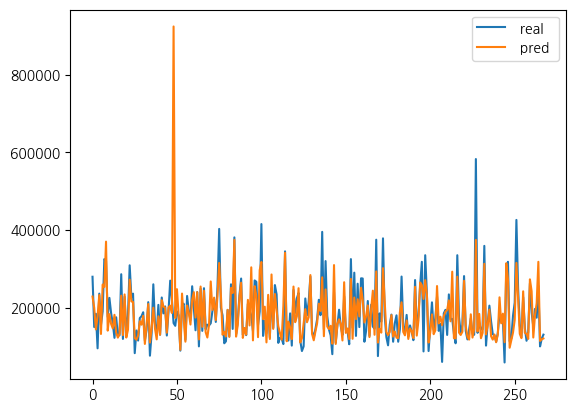

In [60]:
result[:].plot() # pred는 예측값